In [ ]:
pip install catboost


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier



> **PREPROCESSING**



In [ ]:
data = pd.read_csv('/content/adult 3.csv')
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
print(data.age.value_counts())

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [ ]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
print(data.fnlwgt.value_counts())

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
436163     1
320084     1
125976     1
211349     1
120478     1
Name: count, Length: 28523, dtype: int64


In [ ]:
print(data.education.value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [ ]:
print(data.occupation.replace({'?':' other'},inplace=True))

None


/tmp/ipython-input-24-395511050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(data.occupation.replace({'?':' other'},inplace=True))


In [ ]:
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
 other               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
print(data.workclass.replace({'?':'other'},inplace=True))

None


/tmp/ipython-input-26-2718811194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(data.workclass.replace({'?':'other'},inplace=True))


In [ ]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,other,103497,Some-college,10,Never-married,other,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [ ]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
other                2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
data.shape

(48811, 15)

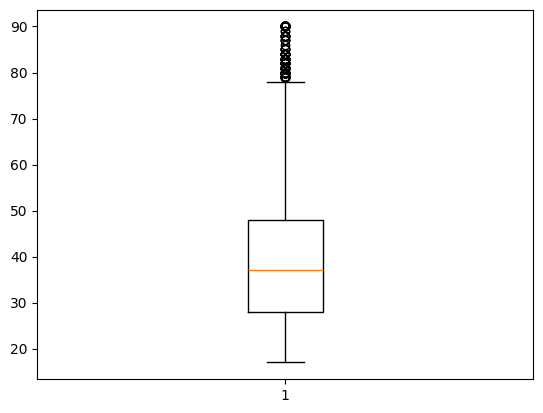

In [ ]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [ ]:
data=data[(data['age']<=75)&(data['age']>=17)]

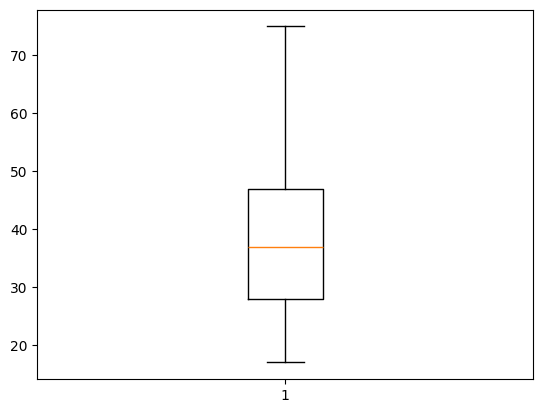

In [ ]:
plt.boxplot(data['age'])
plt.show()

In [ ]:
data.shape

(48438, 15)

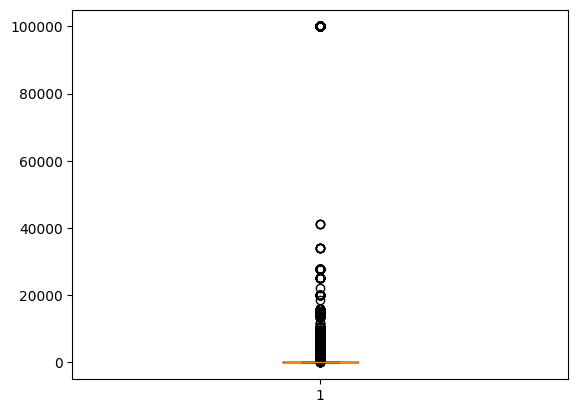

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

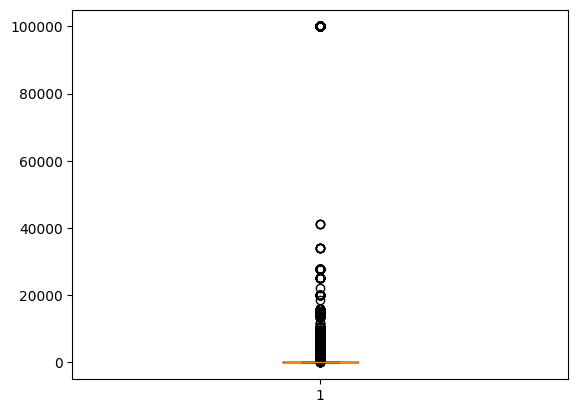

In [ ]:
plt.boxplot(data['capital-gain'])
plt.show()

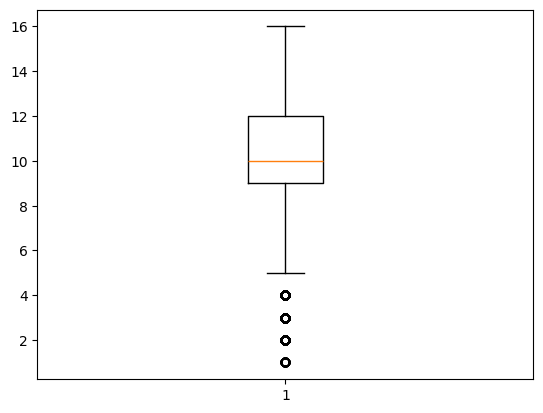

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

In [ ]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

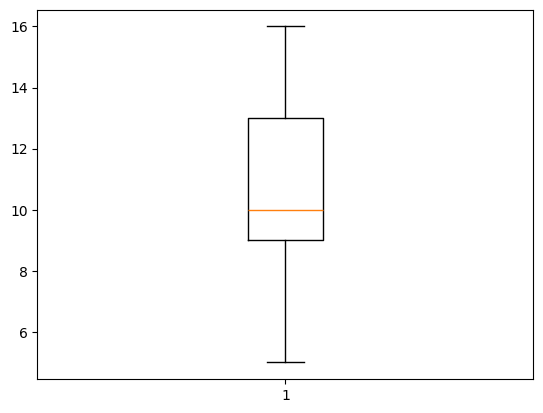

In [ ]:
plt.boxplot(data['educational-num'])
plt.show()

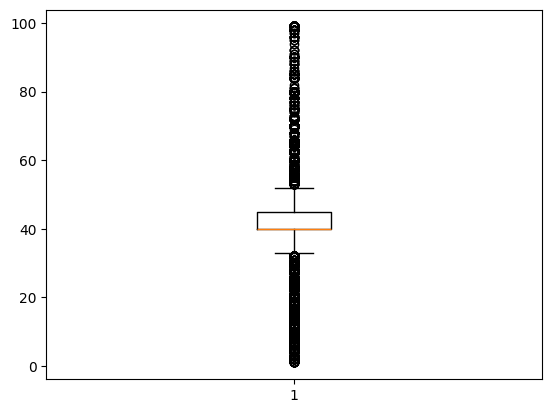

In [ ]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [ ]:
data.shape

(46720, 15)

In [ ]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [ ]:
data=data.drop(columns=['education'])

In [ ]:
# Replace income strings with binary labels
data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})


/tmp/ipython-input-50-3714004831.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].replace({'<=50K': 0, '>50K': 1})


In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,7,4,7,3,2,1,0,0,40,39,0
1,38,2,89814,9,2,5,0,4,1,0,0,50,39,0
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,1
3,44,2,160323,10,2,7,0,2,1,7688,0,40,39,1
4,18,6,103497,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,13,5,4,0,0,0,38,39,0
48838,40,2,154374,9,2,7,0,4,1,0,0,40,39,1
48839,58,2,151910,9,6,1,4,4,0,0,0,40,39,0
48840,22,2,201490,9,4,1,3,4,1,0,0,20,39,0


In [ ]:
X = data.drop('income', axis=1)
y = data['income']

X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,7,4,7,3,2,1,0,0,40,39
1,38,2,89814,9,2,5,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,2,160323,10,2,7,0,2,1,7688,0,40,39
4,18,6,103497,10,4,0,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,12,2,13,5,4,0,0,0,38,39
48838,40,2,154374,9,2,7,0,4,1,0,0,40,39
48839,58,2,151910,9,6,1,4,4,0,0,0,40,39
48840,22,2,201490,9,4,1,3,4,1,0,0,20,39


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Models
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}



In [ ]:
accuracies = {}
feature_importances = {}

# 🔍 Training & Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

    # Save feature importances if available
    if hasattr(model, "feature_importances_"):
        feature_importances[name] = model.feature_importances_




Random Forest Accuracy: 0.8504
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7010
           1       0.74      0.62      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.84      0.85      0.85      9344



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.8635
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7010
           1       0.77      0.65      0.70      2334

    accuracy                           0.86      9344
   macro avg       0.83      0.79      0.81      9344
weighted avg       0.86      0.86      0.86      9344

[LightGBM] [Info] Number of positive: 9195, number of negative: 28181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 37376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246013 -> initscore=-1.119988
[LightGBM] [Info] Start training from score -1.119988

LightGBM Accuracy: 0.8653
              precision    recall  f1-score   support

         

/tmp/ipython-input-56-1127991415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')


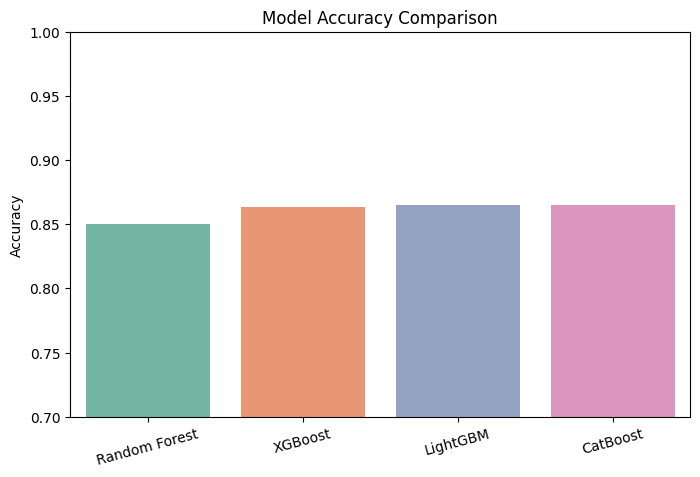

In [ ]:
# 📊 Bar chart of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.xticks(rotation=15)
plt.show()




📌 Showing top features from best model: LightGBM


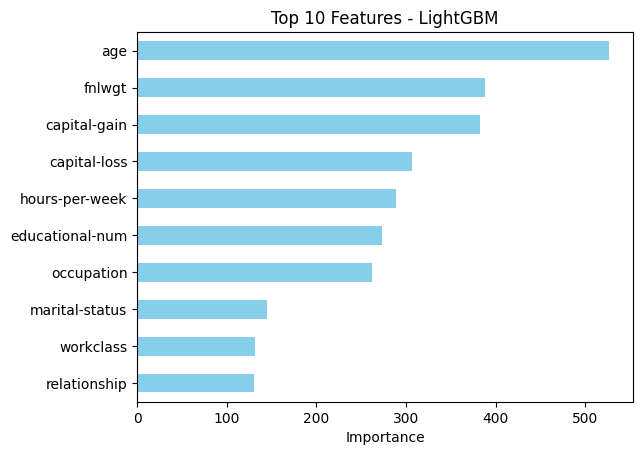

In [ ]:
# 📈 Feature Importances from the best model (highest accuracy)
best_model_name = max(accuracies, key=accuracies.get)
print(f"\n📌 Showing top features from best model: {best_model_name}")

if best_model_name in feature_importances:
    imp_series = pd.Series(feature_importances[best_model_name], index=X.columns)
    imp_series.nlargest(10).plot(kind='barh', color='skyblue')
    plt.title(f"Top 10 Features - {best_model_name}")
    plt.xlabel("Importance")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("❌ Feature importance not available for this model.")



In [ ]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.8535 ± 0.0021


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.8694 ± 0.0013
[LightGBM] [Info] Number of positive: 9224, number of negative: 28152
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 37376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246789 -> initscore=-1.115810
[LightGBM] [Info] Start training from score -1.115810
[LightGBM] [Info] Number of positive: 9223, number of negative: 28153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 37376,

[LightGBM] [Info] Number of positive: 9195, number of negative: 28181
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 37376, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246013 -> initscore=-1.119988
[LightGBM] [Info] Start training from score -1.119988


 99%|===================| 9266/9344 [00:36<00:00]       

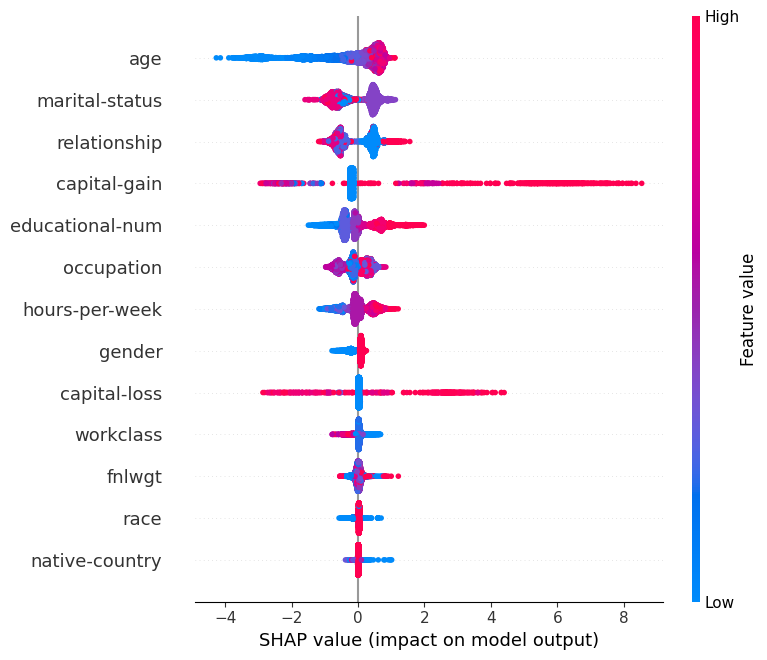

In [ ]:
import shap

# Fit model again just in case
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

# SHAP Explainer
explainer = shap.Explainer(lgb, X_train)
shap_values = explainer(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test)


In [ ]:
import joblib

# Save the trained LightGBM model
joblib.dump(lgb, 'best_lgbm_model.pkl')


['best_lgbm_model.pkl']